
# An udpade on mortality and morbidity global rates to track covid-19 outbreak - A case study.

# Background:
---
* In December, 2019, a local outbreak of pneumonia of initially unknown cause was detected in Wuhan (Hubei, China), and was quickly identified to be caused by a novel coronavirus, namely severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The outbreak has since spread to every province of mainland China as well as 27 other countries and regions, with more than 70 000 confirmed cases as of Feb 17, 2020. In response to this ongoing public health emergency, an online interactive dashboard, hosted by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University, Baltimore, MD, USA, to visualise and track reported cases of coronavirus disease 2019 (COVID-19) in real time. All data collected and displayed are made freely available, initially through Google Sheets and now through a GitHub repository, along with the feature layers of the dashboard, which are now included in the Esri Living Atlas. On March 10, 2023, the Johns Hopkins Coronavirus Resource Center ceased its collecting and reporting of global COVID-19 data *
---

# Objective:
---
* Understanding and identifying any trends on confirmed (positive), death(mortality), active(recovered) cases *
---

# Method:
---
* Data was collated from Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE, the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL). An opendata source was used to retrieve data [this is a link].(https://github.com/CSSEGISandData/COVID-19). *
---

In [132]:
## Importing libraries for data aquisition and evidence syntheis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
## Graphical preparation

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [134]:
## Using Covid-19 CSSE at John Hopkins University data from J.H github repositoiry

positive_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortality_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
morbidity_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# An overview of the data sets

In [136]:
### Shape of the data sets

print(positive_df.shape)
print(mortality_df.shape)
print(morbidity_df.shape)

(289, 1147)
(289, 1147)
(274, 1147)


In [137]:
### Content in the data set

positive_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [138]:
mortality_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [139]:
morbidity_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
### Identifying missing values within each data sets

positive_df.isna().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [141]:
mortality_df.isna().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [142]:
morbidity_df.isna().sum()

Province/State    199
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [143]:
### Identifying unique values within the data sets

positive_df.nunique()

Province/State     91
Country/Region    201
Lat               283
Long              284
1/22/20            11
                 ... 
3/5/23            287
3/6/23            287
3/7/23            287
3/8/23            287
3/9/23            287
Length: 1147, dtype: int64

In [144]:
mortality_df.nunique()

Province/State     91
Country/Region    201
Lat               283
Long              284
1/22/20             2
                 ... 
3/5/23            244
3/6/23            243
3/7/23            243
3/8/23            243
3/9/23            242
Length: 1147, dtype: int64

In [145]:
morbidity_df.nunique()

Province/State     75
Country/Region    201
Lat               272
Long              272
1/22/20             3
                 ... 
3/5/23              1
3/6/23              1
3/7/23              1
3/8/23              1
3/9/23              1
Length: 1147, dtype: int64

In [146]:
### Counting multiple entry by country/region

positive_df['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [147]:
mortality_df['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [148]:
morbidity_df['Country/Region'].value_counts()

China             34
United Kingdom    15
France            12
Australia          8
Netherlands        5
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [149]:
## Data cleaning

## Changing the coloumns 'Province/State' & 'Country/Region' & change latest date to 'Current'.

In [150]:
col=positive_df.columns[-1]

positive_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
mortality_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
morbidity_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
positive_df.head(3)
mortality_df.head(3)
morbidity_df.head(3)

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
## Creating new data frame through combining unique country entries

In [152]:
### Positive cases

positive = pd.DataFrame(positive_df.groupby('Country').sum())
positive.reset_index(inplace = True)
positive.head(5)

/tmp/ipykernel_1139/1101471026.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [153]:
### Moratlity cases

mortality = pd.DataFrame(mortality_df.groupby('Country').sum())
mortality.reset_index(inplace = True)
mortality.head(5)

/tmp/ipykernel_1139/1933718209.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [154]:
### Morbidity cases

morbidity = pd.DataFrame(morbidity_df.groupby('Country').sum())
morbidity.reset_index(inplace = True)
morbidity.head(5)

/tmp/ipykernel_1139/3587905092.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
### Eliminating cordination data (latitude and Longitude)

col = positive['Country']
positive.drop(['Lat','Long'],axis=1,inplace=True)
positive.head(3)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496


In [156]:
col = mortality['Country']
mortality.drop(['Lat','Long'],axis=1,inplace=True)
mortality.head(3)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


In [157]:
col = morbidity['Country']
morbidity.drop(['Lat','Long'],axis=1,inplace=True)
morbidity.head(3)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
## Calculating active cases

In [159]:
### Creating new data frame of Active cases

active= positive.copy()
for i in active.columns[1:]:
    active[i] =active[i] - mortality[i]
active.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,201426,201444,201462,201466,201473,201494,201510,201540,201555,201555
1,Albania,0,0,0,0,0,0,0,0,0,...,330793,330810,330810,330829,330829,330829,330829,330829,330845,330859
2,Algeria,0,0,0,0,0,0,0,0,0,...,264560,264567,264582,264588,264588,264596,264596,264609,264613,264615
3,Andorra,0,0,0,0,0,0,0,0,0,...,47701,47710,47710,47710,47710,47710,47710,47710,47725,47725
4,Angola,0,0,0,0,0,0,0,0,0,...,103322,103344,103344,103344,103344,103344,103344,103344,103355,103355


In [160]:
## Data analysis

In [161]:
## Overall cases for each conditions

In [162]:
print("Positive Cases :" , positive.iloc[:,-1].sum())
print("Mortality Cases :" , mortality.iloc[:,-1].sum())
print("Active Cases :", active.iloc[:,-1].sum())

Positive Cases : 676570149
Mortality Cases : 6881802
Active Cases : 669688347


In [163]:
## Highest records of countries per each conditions.

In [164]:
positive_data = positive[['Country','Current']].sort_values('Current',ascending = False)
mortality_data = mortality[['Country','Current']].sort_values('Current',ascending = False)
active_data = active[['Country','Current']].sort_values('Current',ascending = False)

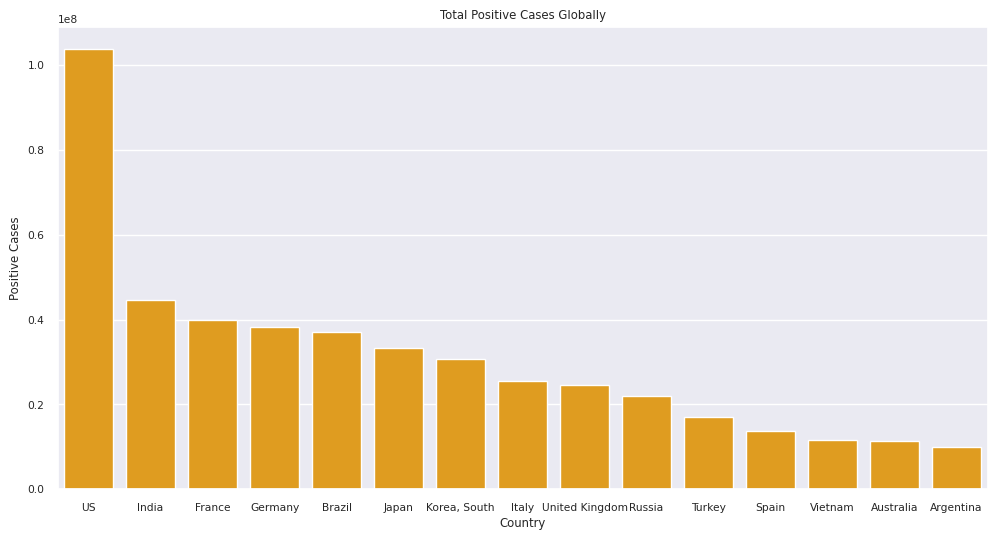

In [165]:
### Positive cases

sns.set(font_scale=0.7)
plt.figure(figsize=(12, 6))
fig= sns.barplot(x='Country', y='Current', data=positive_data[:15], orient='v',color='Orange')
plt.title('Total Positive Cases Globally')
fig.set(xlabel ='Country', ylabel ='Positive Cases')
plt.show()

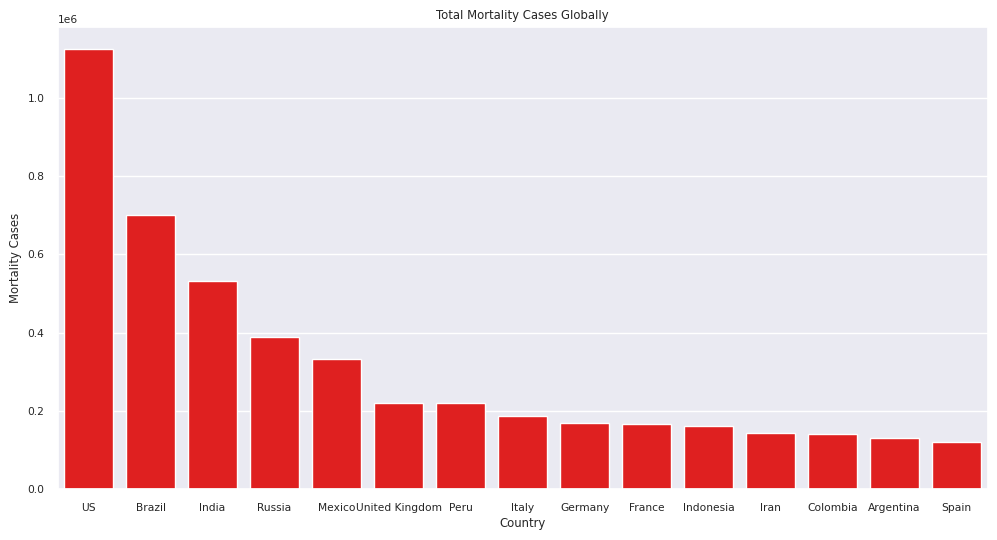

In [166]:
### Mortality cases

sns.set(font_scale=0.7)
plt.figure(figsize=(12, 6))
fig= sns.barplot(x='Country', y='Current', data=mortality_data[:15], orient='v',color='Red')
plt.title('Total Mortality Cases Globally')
fig.set(xlabel ='Country', ylabel ='Mortality Cases')
plt.show()

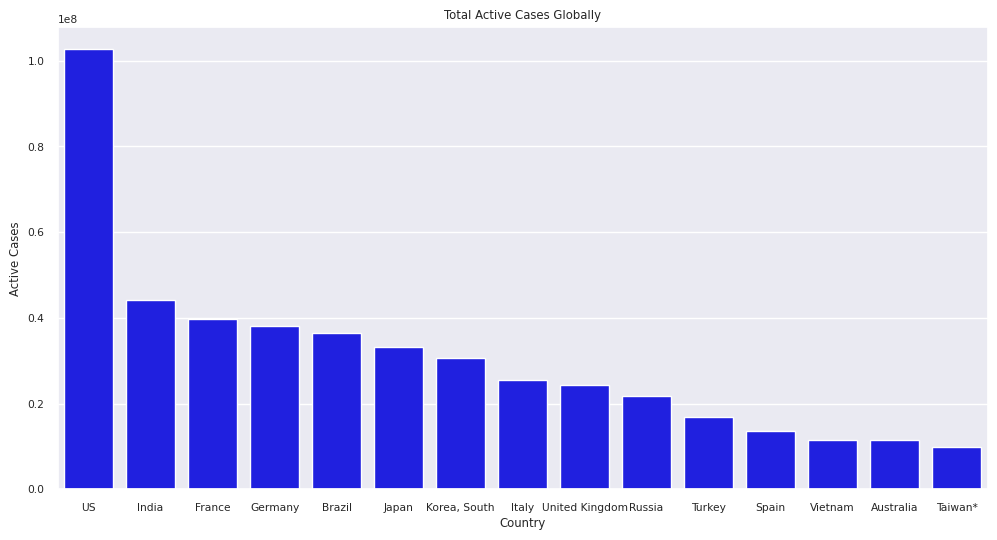

In [167]:
### Active cases

sns.set(font_scale=0.7)
plt.figure(figsize=(12, 6))
fig= sns.barplot(x='Country', y='Current', data=active_data[:15], orient='v',color='blue')
plt.title('Total Active Cases Globally')
fig.set(xlabel ='Country', ylabel ='Active Cases')
plt.show()

In [168]:
## Total cases in UK, USA, Australia, India, Brazil, South Africa

In [169]:
### Total positive cases in UK, USA, Australia, India, Brazil, South Africa

usa_positive = positive[positive.Country == 'US'].iloc[:,1:].sum().values.tolist()
uk_positive = positive[positive.Country == 'United Kingdom'].iloc[:,1:].sum().values.tolist()
australia_positive = positive[positive.Country == 'Austrlia'].iloc[:,1:].sum().values.tolist()
india_positive = positive[positive.Country == 'India'].iloc[:,1:].sum().values.tolist()
sa_positive = positive[positive.Country == 'South Africa'].iloc[:,1:].sum().values.tolist()
brazil_positive = positive[positive.Country == 'Brazil'].iloc[:,1:].sum().values.tolist()

### Total mortality cases in UK, USA, Australia, India, Brazil, South Africa

usa_mortality = mortality[mortality.Country == 'US'].iloc[:,1:].sum().values.tolist()
uk_mortality = mortality[mortality.Country == 'United Kingdom'].iloc[:,1:].sum().values.tolist()
australia_mortality = mortality[mortality.Country == 'Austrlia'].iloc[:,1:].sum().values.tolist()
india_mortality = mortality[mortality.Country == 'India'].iloc[:,1:].sum().values.tolist()
sa_mortality = mortality[mortality.Country == 'South Africa'].iloc[:,1:].sum().values.tolist()
brazil_mortality = mortality[mortality.Country == 'Brazil'].iloc[:,1:].sum().values.tolist()

### Total active cases in UK, USA, Australia, India, Brazil, South Africa

usa_active = active[active.Country == 'US'].iloc[:,1:].sum().values.tolist()
uk_active = active[active.Country == 'United Kingdom'].iloc[:,1:].sum().values.tolist()
australia_active = active[active.Country == 'Austrlia'].iloc[:,1:].sum().values.tolist()
india_active = active[active.Country == 'India'].iloc[:,1:].sum().values.tolist()
sa_active = active[active.Country == 'South Africa'].iloc[:,1:].sum().values.tolist()
brazil_active = active[active.Country == 'Brazil'].iloc[:,1:].sum().values.tolist()

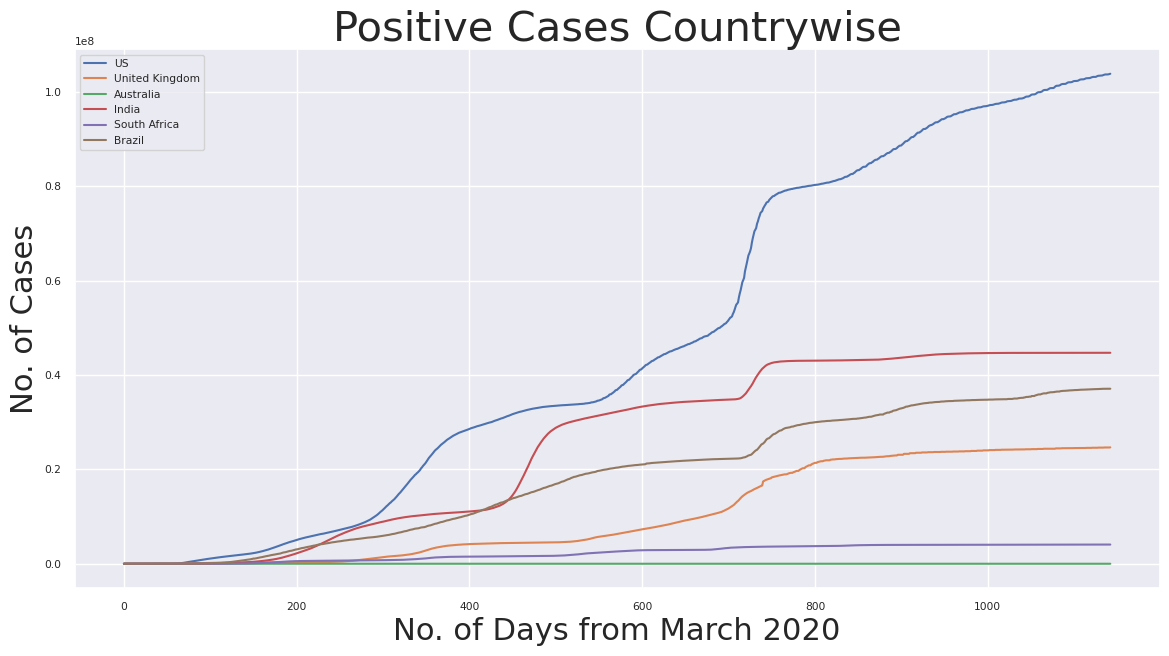

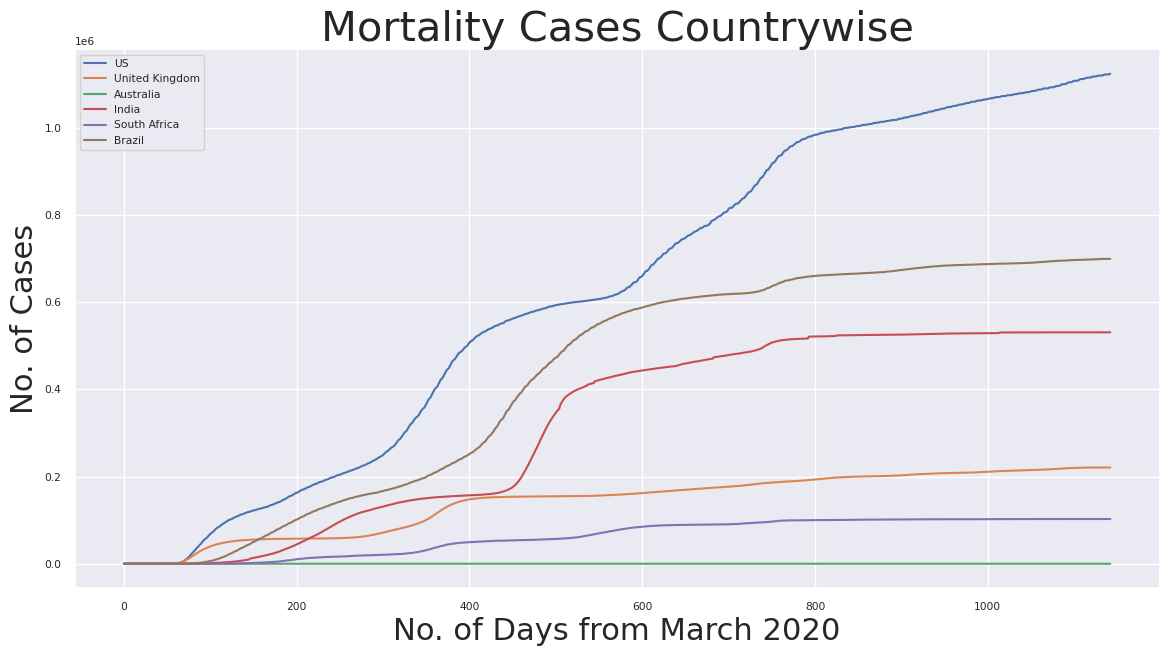

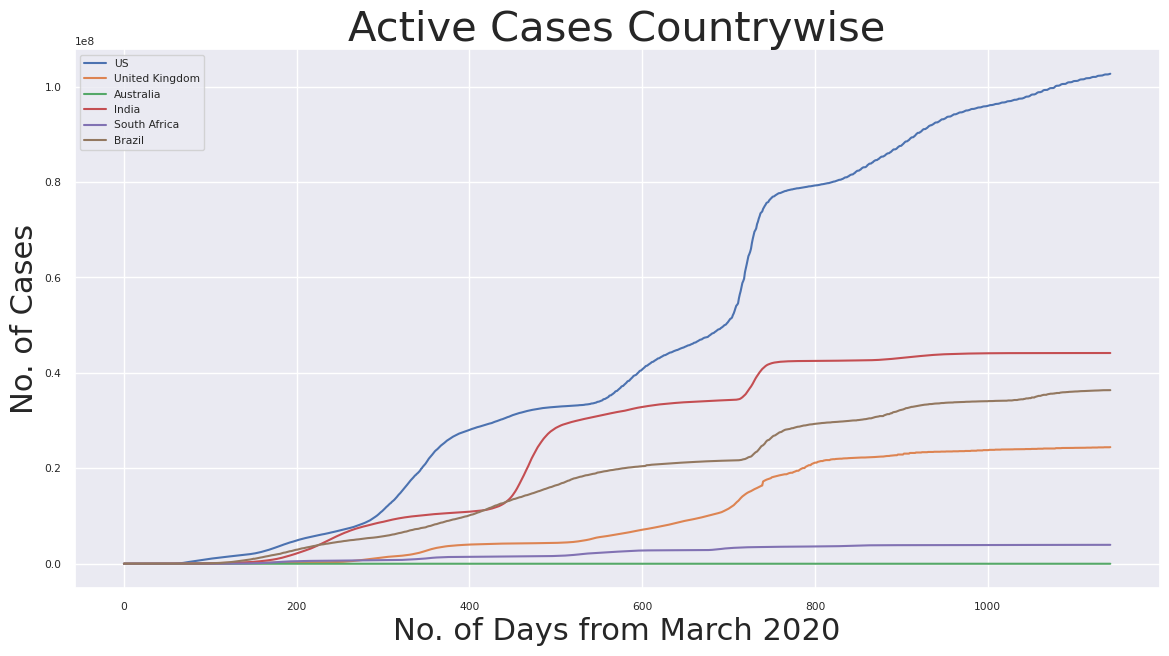

In [170]:
### Positive cases

plt.figure(figsize=(14,7))
plt.plot(usa_positive)
plt.plot(uk_positive)
plt.plot(australia_positive)
plt.plot(india_positive)
plt.plot(sa_positive)
plt.plot(brazil_positive)

plt.title('Positive Cases Countrywise', size=30)
plt.xlabel('No. of Days from March 2020', size=22)
plt.ylabel('No. of Cases', size=22)
plt.legend(['US', 'United Kingdom','Australia','India','South Africa','Brazil'])
plt.show()

### Mortality cases

plt.figure(figsize=(14,7))
plt.plot(usa_mortality)
plt.plot(uk_mortality)
plt.plot(australia_mortality)
plt.plot(india_mortality)
plt.plot(sa_mortality)
plt.plot(brazil_mortality)

plt.title('Mortality Cases Countrywise', size=30)
plt.xlabel('No. of Days from March 2020', size=22)
plt.ylabel('No. of Cases', size=22)
plt.legend(['US', 'United Kingdom','Australia','India','South Africa','Brazil'])
plt.show()

### Active cases

plt.figure(figsize=(14,7))
plt.plot(usa_active)
plt.plot(uk_active)
plt.plot(australia_active)
plt.plot(india_active)
plt.plot(sa_active)
plt.plot(brazil_active)

plt.title('Active Cases Countrywise', size=30)
plt.xlabel('No. of Days from March 2020', size=22)
plt.ylabel('No. of Cases', size=22)
plt.legend(['US', 'United Kingdom','Australia','India','South Africa','Brazil'])
plt.show()

In [171]:
# Initial Results:

## Initailly the number of positive cases was increasing each month for all the countries, following the identified number came to a constant rate since two years from the outbreat, except the United States.
## The mortality and active state of cases follwed a similar patter across the countries.
## Australia was identified to have an extremly low rates with positive, mortality and active cases untill now, having US the quite opposite with hisghest rates.


In [172]:
### The rate of each conditions since March 2020

positive_date = positive.iloc[:,1:].sum().values.tolist()
mortality_date = mortality.iloc[:,1:].sum().values.tolist()
active_date = active.iloc[:,1:].sum().values.tolist()



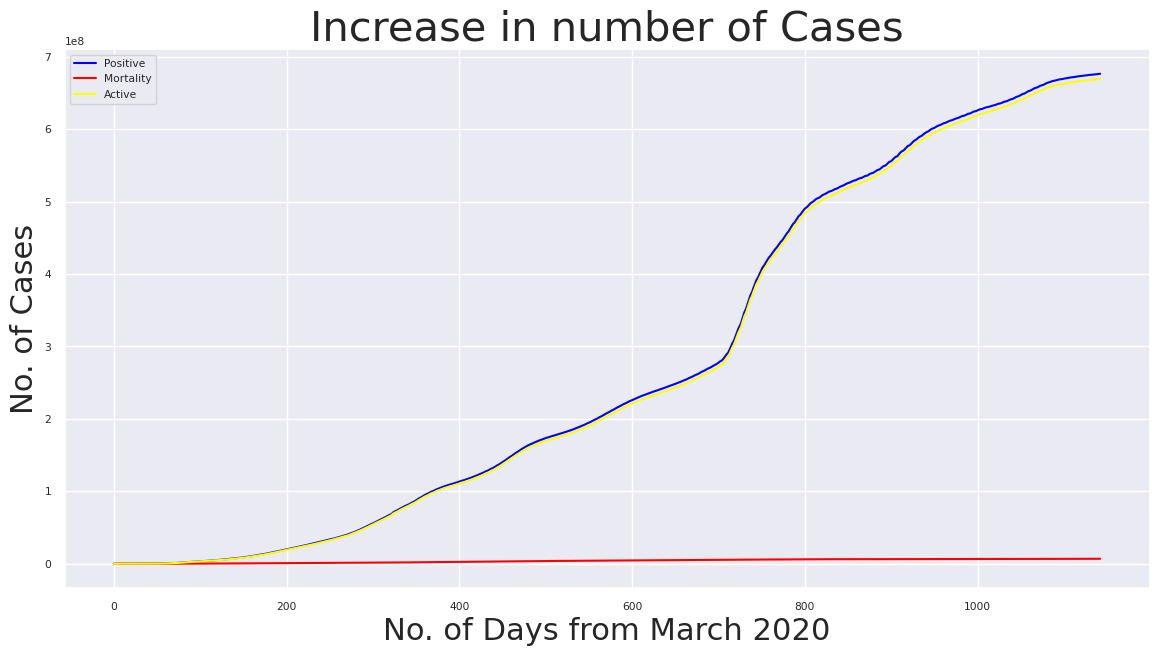

In [173]:
plt.figure(figsize=(14,7))
plt.plot(positive_date,color='Blue')
plt.plot(mortality_date,color='Red')
plt.plot(active_date,color='Yellow')

plt.xlabel('No. of Days from March 2020',size=22)
plt.ylabel('No. of Cases',size=22)
plt.title('Increase in number of Cases',size=30)
plt.legend(['Positive','Mortality','Active'])
plt.show()

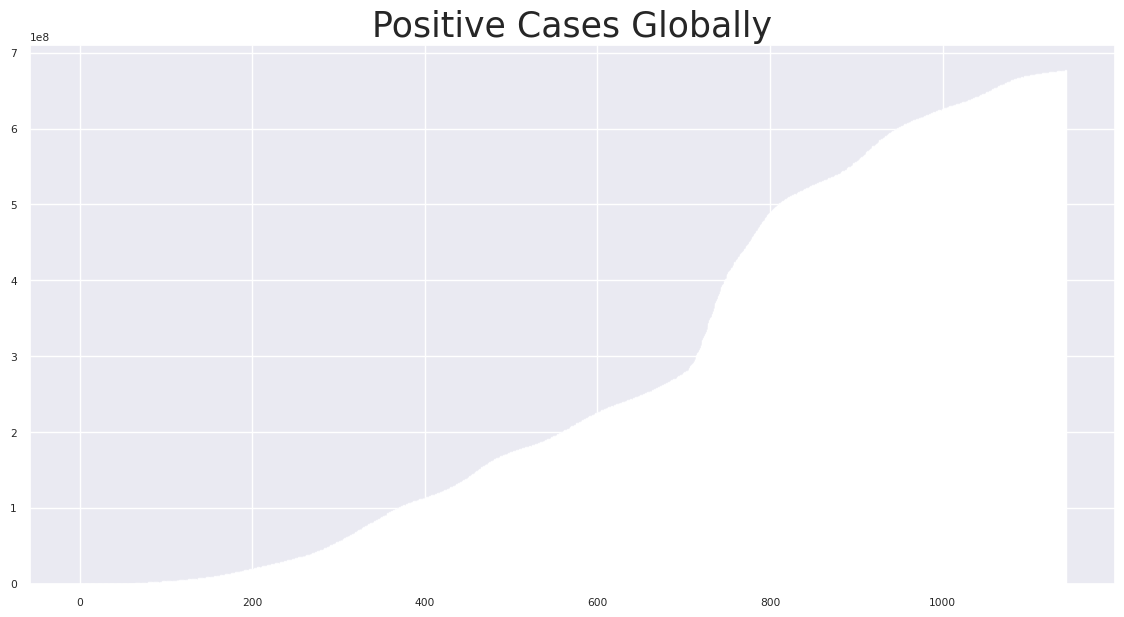

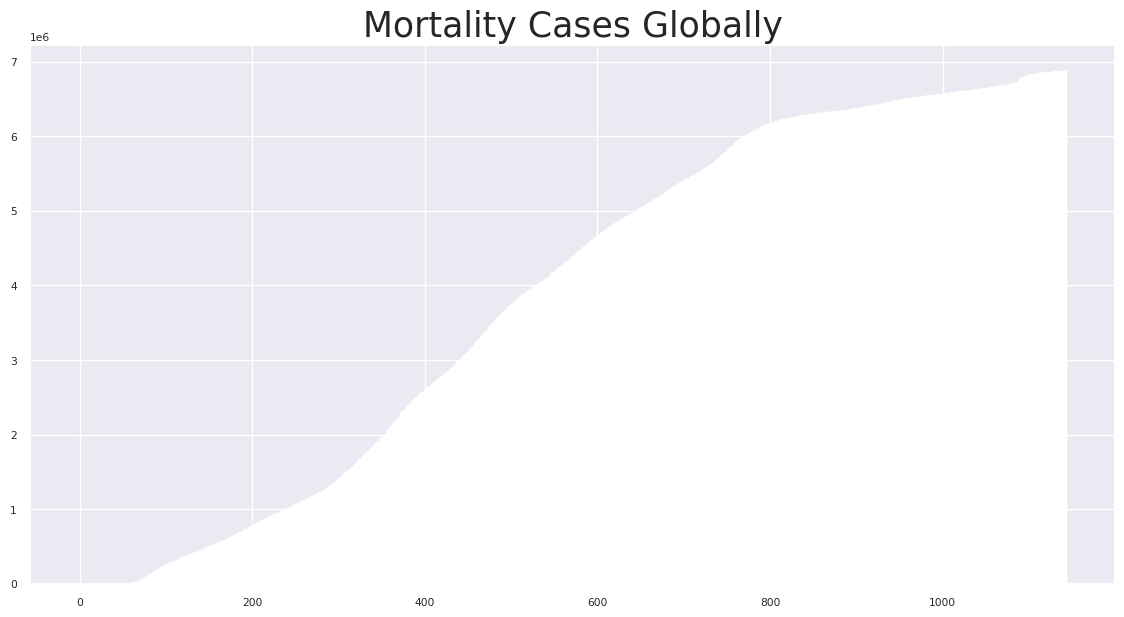

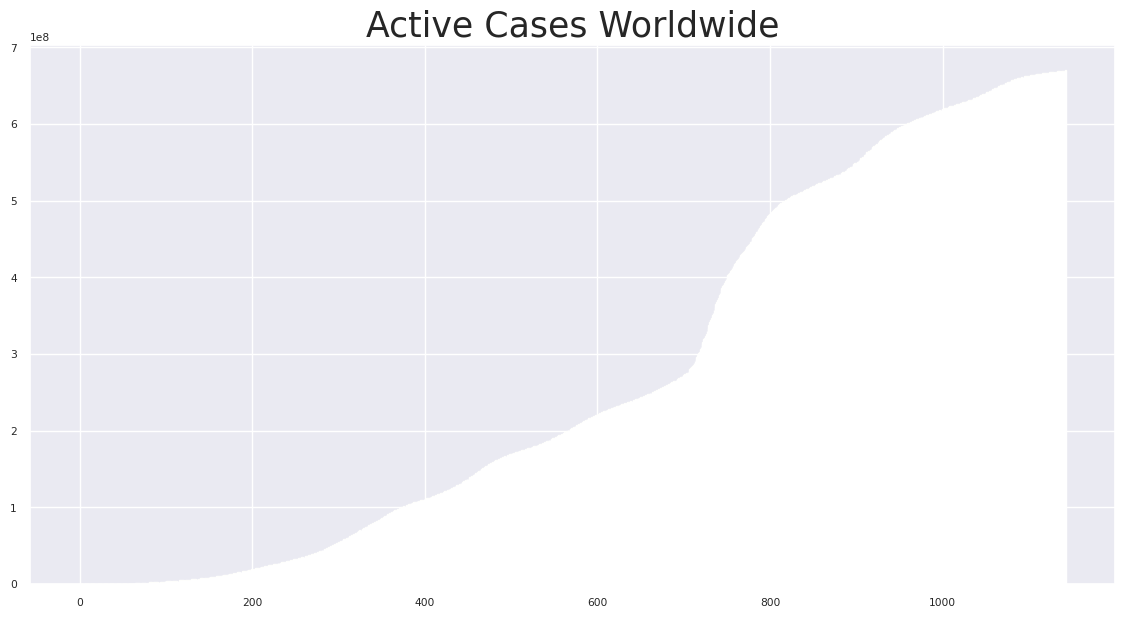

In [174]:
days = [ i for i in range(positive.shape[1] - 1) ] 

plt.figure(figsize=(14,7))
plt.bar(days,positive_date,color='Blue')
plt.title('Positive Cases Globally',size=25)
plt.show()

plt.figure(figsize=(14,7))
plt.bar(days,mortality_date,color='Red')
plt.title('Mortality Cases Globally',size=25)
plt.show()

plt.figure(figsize=(14,7))
plt.bar(days,active_date,color='Yellow')
plt.title('Active Cases Worldwide',size=25)
plt.show()

In [175]:
# Initial results:

## An exponential growth in positive cases was identified on third month from the outbreak, having a spike after second year.
## There was a gradual increase in mortality rate from second month onwards.
## A similar path was identified with active cases as covid positive.

In [176]:
# The distribution of cases nationwise:

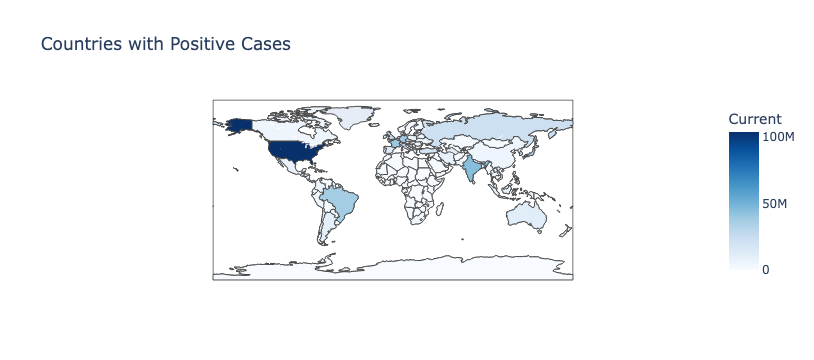

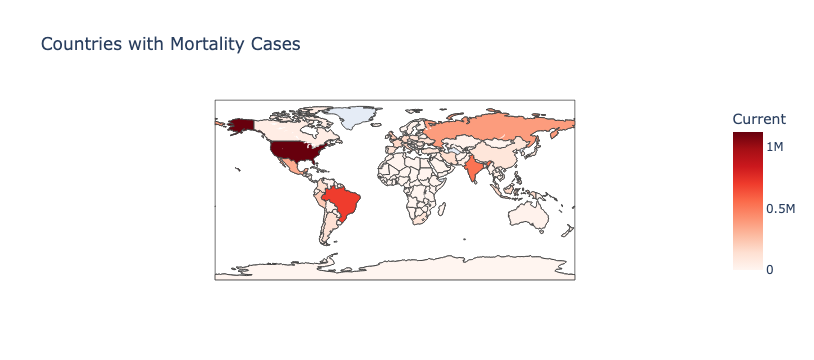

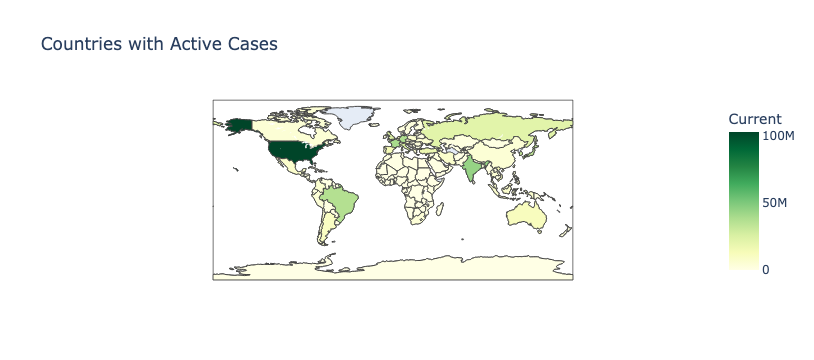

In [177]:
### Positive cases

fig = px.choropleth(positive_data, locations="Country", locationmode='country names', 
                  color=positive_data['Current'], hover_name="Country", 
                  title='Countries with Positive Cases',hover_data=['Current'], color_continuous_scale="blues")
fig.show()

### Mortality cases

fig = px.choropleth(mortality_data, locations="Country", locationmode='country names', 
                  color=mortality_data['Current'], hover_name="Country", 
                  title='Countries with Mortality Cases',hover_data=['Current'], color_continuous_scale="reds")
fig.show()

### Active cases 

fig = px.choropleth(active_data, locations="Country", locationmode='country names', 
                  color=active_data['Current'], hover_name="Country", 
                  title='Countries with Active Cases',hover_data=['Current'], color_continuous_scale="ylgn")
fig.show()

In [178]:
# Linear Regression

In [179]:
total_positive = np.array(positive_date).reshape(-1,1)
total_mortality = np.array(mortality_date).reshape(-1,1)
total_active = np.array(active_date).reshape(-1,1)
dates = np.array([i for i in range(len(days))]).reshape(-1, 1)

In [180]:
## Linear Graph

def linear_plot(x,y,reg,title):
    plt.figure(figsize=(14,7)) 
    plt.scatter(x,y,color='blue')
    plt.plot(x,reg)
    plt.title(title)

In [181]:
X_train_positive, X_test_positive, y_train_positive, y_test_positive = train_test_split(dates[100:], total_positive[100:], test_size=0.14, shuffle=False) 

In [182]:
reg = LinearRegression()
reg.fit(X_train_positive, y_train_positive);

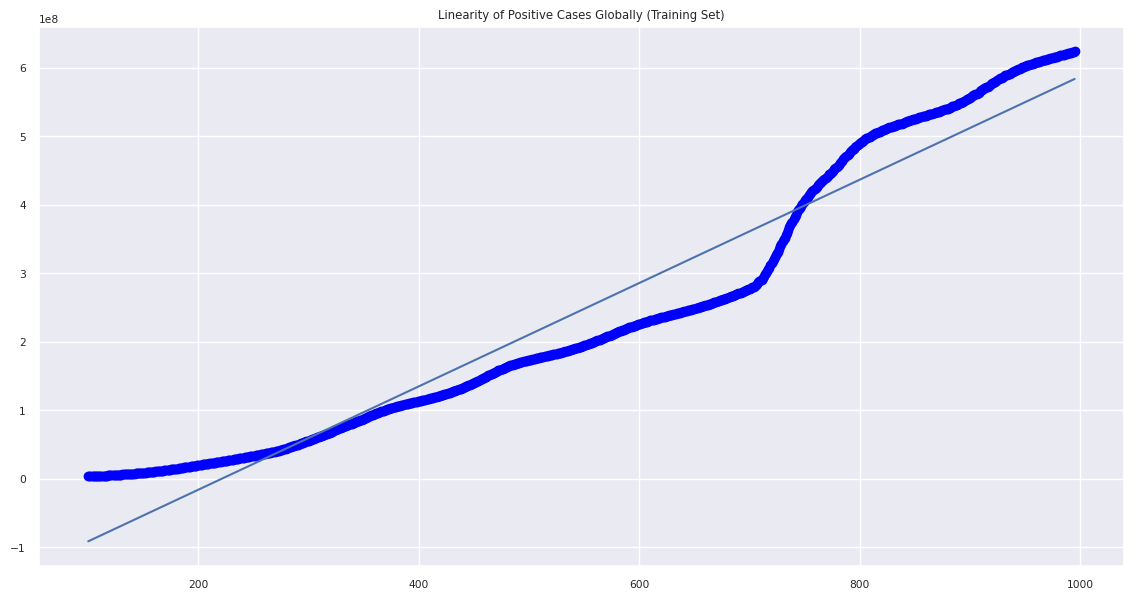

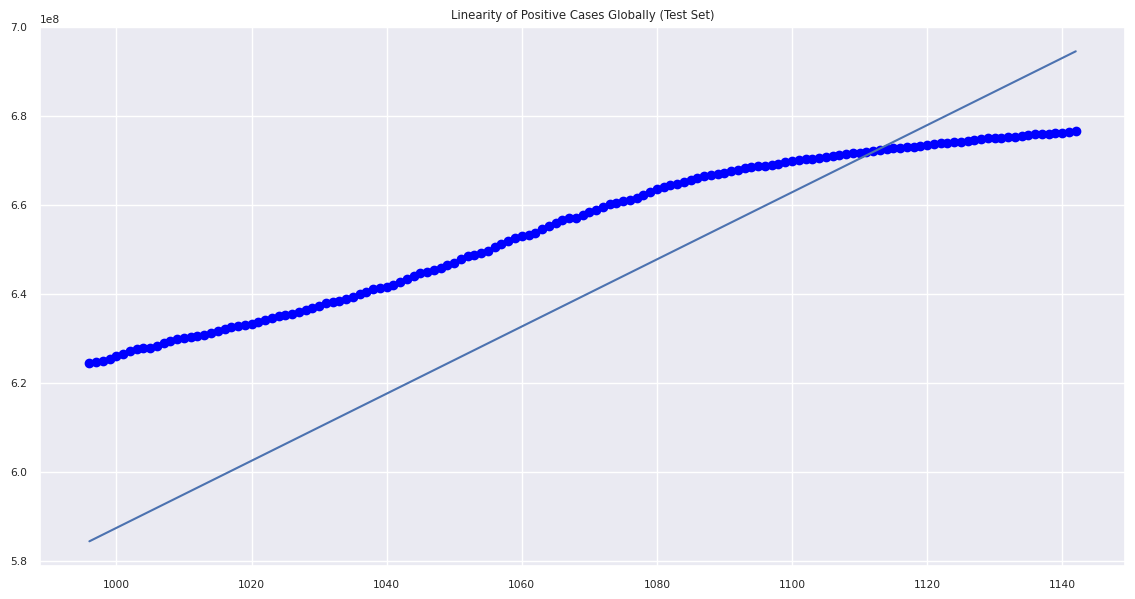

In [183]:
## Plot trainning set

linear_plot(X_train_positive,y_train_positive,reg.predict(X_train_positive),'Linearity of Positive Cases Globally (Training Set)')

## Plot test set

linear_plot(X_test_positive,y_test_positive,reg.predict(X_test_positive),'Linearity of Positive Cases Globally (Test Set)')

In [184]:
### The test set predictions are not similar as the trainning set predictions. As the total positive cases iregular curves, polynomial regression model was approached.

In [185]:
# Polynomial Regression

In [186]:
## Positive Cases

### Data transformation

poly = PolynomialFeatures(degree=5)
poly_X_train_positive = poly.fit_transform(X_train_positive)
poly_X_test_positive = poly.fit_transform(X_test_positive)

In [187]:
### polynomial regression for positive cases

poly_reg = LinearRegression(fit_intercept=False)
poly_reg.fit(poly_X_train_positive, y_train_positive)

LinearRegression(fit_intercept=False)

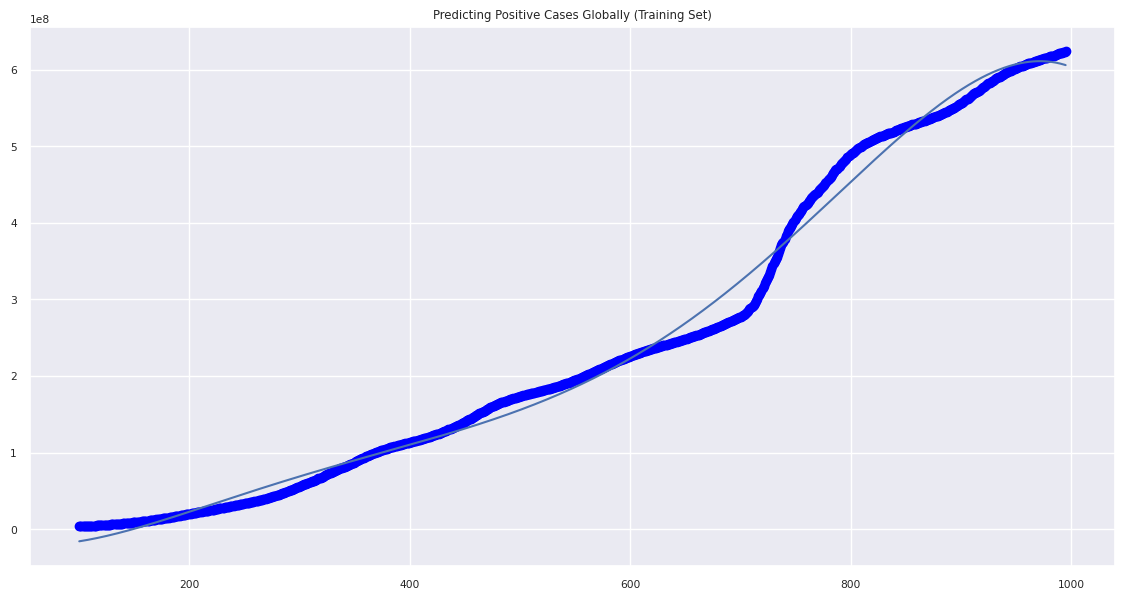

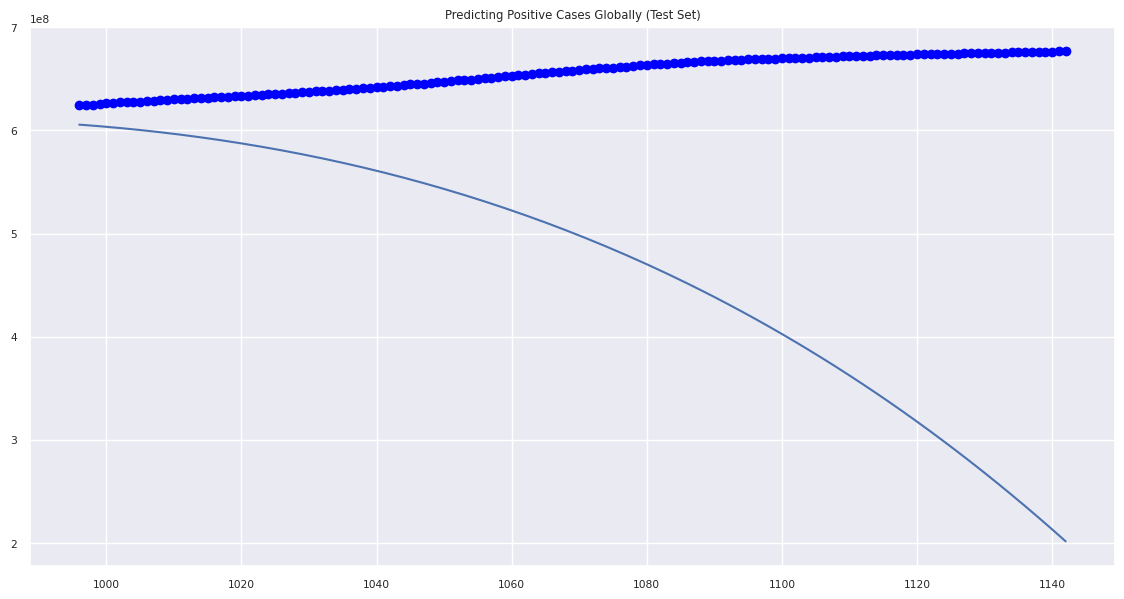

In [188]:
### Plot training set
linear_plot(X_train_positive,y_train_positive,poly_reg.predict(poly_X_train_positive),'Predicting Positive Cases Globally (Training Set)')

### Plot test set
linear_plot(X_test_positive,y_test_positive,poly_reg.predict(poly_X_test_positive),'Predicting Positive Cases Globally (Test Set)')

In [189]:
### Training set curve showed similar prediction

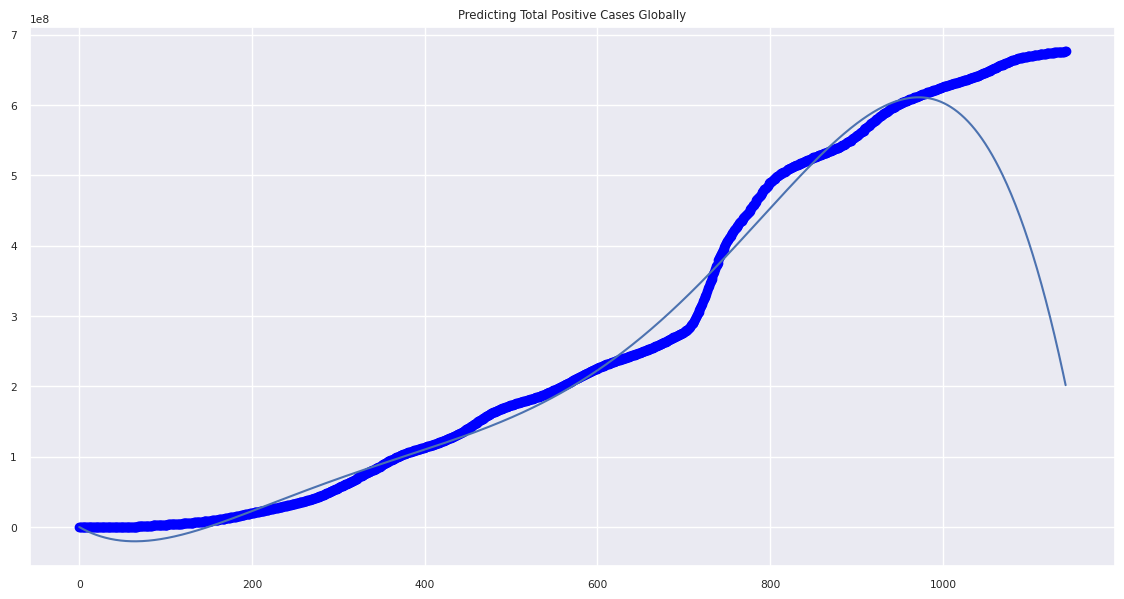

In [190]:
### Plot of total cases

linear_plot(dates,total_positive,poly_reg.predict(poly.fit_transform(dates)),'Predicting Total Positive Cases Globally')

In [191]:
## Mortality cases

In [192]:
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(dates[60:], total_mortality[60:], test_size=0.14, shuffle=False) 

In [193]:
### transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_mortality = poly.fit_transform(X_train_mortality)
poly_X_test_mortality = poly.fit_transform(X_test_mortality)

### polynomial regression
poly_reg = LinearRegression(fit_intercept=False)
poly_reg.fit(poly_X_train_mortality, y_train_mortality)

LinearRegression(fit_intercept=False)

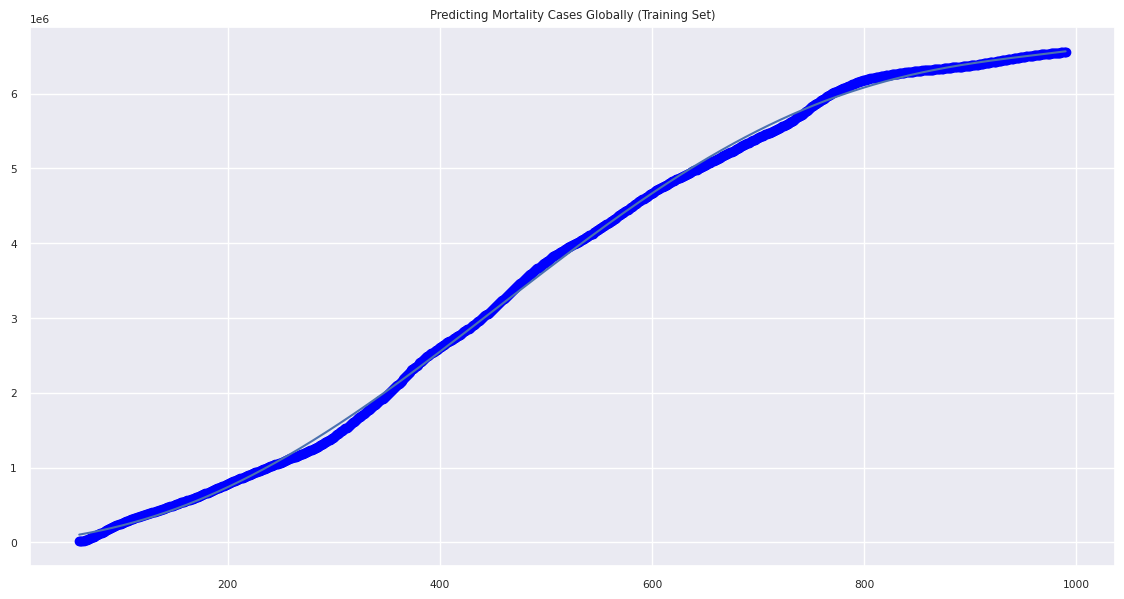

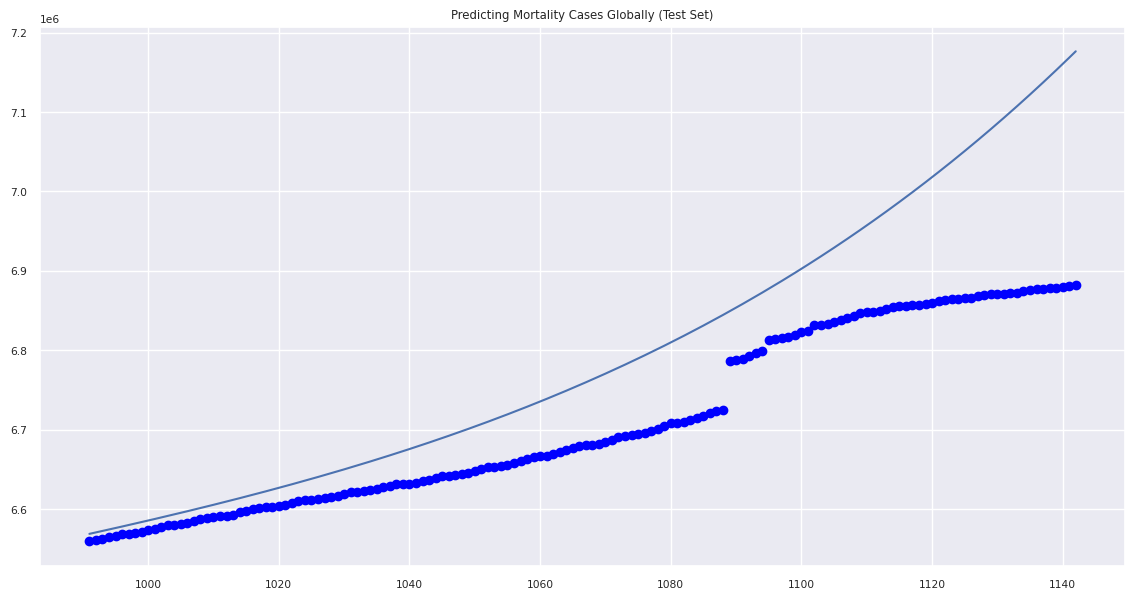

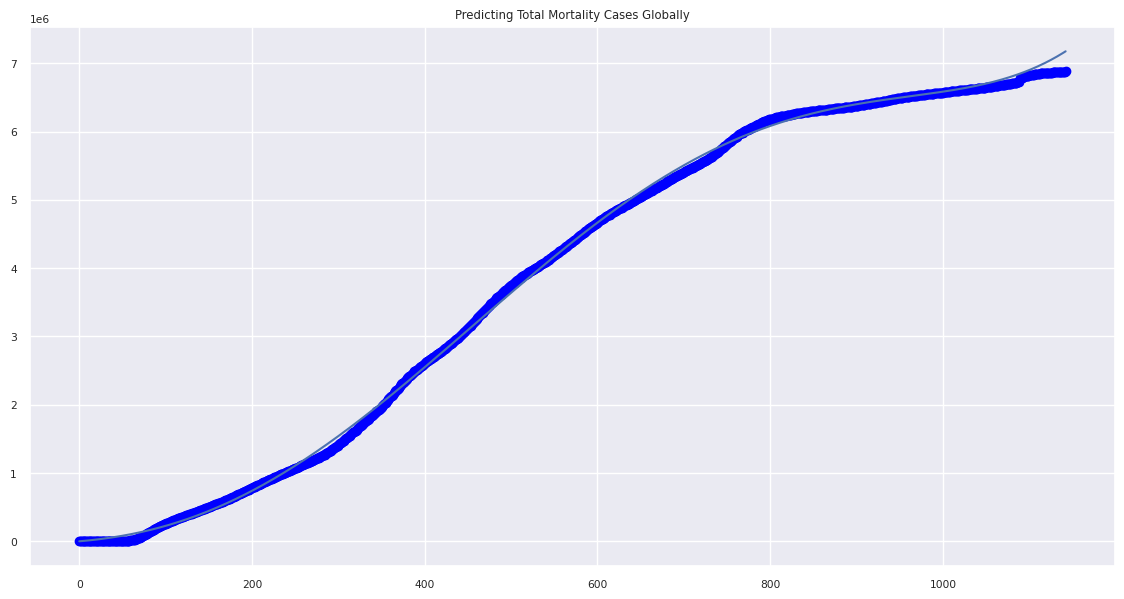

In [194]:
# Plot training set
linear_plot(X_train_mortality,y_train_mortality,poly_reg.predict(poly_X_train_mortality),'Predicting Mortality Cases Globally (Training Set)')

# Plot test set
linear_plot(X_test_mortality,y_test_mortality,poly_reg.predict(poly_X_test_mortality),'Predicting Mortality Cases Globally (Test Set)')

# Plot total cases
linear_plot(dates,total_mortality,poly_reg.predict(poly.fit_transform(dates)),'Predicting Total Mortality Cases Globally')

In [195]:
## The mortality rate predictions showed a similar trend thoughout the duration.

In [ ]:
# Result:
---
* The data sets of confirmed, death, and recovered cases comprised 298, 289 and 274 entries of countries with 1147 values describing the nation, region and cases from 22nd January 2020 to 9th September 2023.
* The total cases identified were 676570149 confirmed, 6881802 deaths and 669688347 recovered. 
* The most confirmed cases were observed in US, India, France, Germany, and Brazil; death cases in US, Brazil, India, Russia and Mexico; recovered cases in US, India, France, Germany and Brazil. 
* Initially, confirmed cases increased monthly for all the countries (US, India, Australia, UK, Brazil and South Africa).  
* A constant rate was identified two years after the first case, which can result from global regulations under quarantine, safety protocols and vaccination, except for the United States.
* A similar fashion of death and recovery rates was observed across the five nations; uniquely, Australia showed a meagre rate with all conditions, whereas the US had the highest rates.
* An exponential growth in confirmed cases was identified after the third month, having a spike after the second year, leading to a gradual increase in death rates globally from the second month onwards. 
---

In [ ]:
# Referece
---
1.	This data set is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

2.	Attribute the data as the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.

3.	For publications that use the data, please cite the following publication: "Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1"

-